# HW 3

In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt

with open('data hw3/train-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    print(data.shape)
    Xtraindata = np.transpose(data.reshape((size, nrows*ncols)))

with open('data hw3/train-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    ytrainlabels = data.reshape((size,)) # (Optional)

with open('data hw3/t10k-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    Xtestdata = np.transpose(data.reshape((size, nrows*ncols)))

with open('data hw3/t10k-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    ytestlabels = data.reshape((size,)) # (Optional)


traindata_imgs =  np.transpose(Xtraindata).reshape((60000,28,28))    
print(Xtraindata.shape)
print(ytrainlabels.shape)
print(Xtestdata.shape)
print(ytestlabels.shape)

(47040000,)
(784, 60000)
(60000,)
(784, 10000)
(10000,)


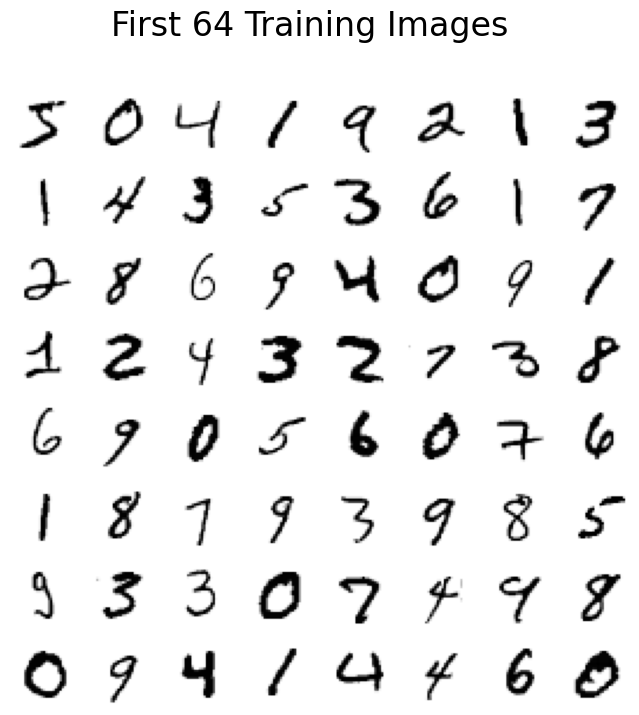

In [2]:
def plot_digits(XX, N, title):
    fig, ax = plt.subplots(N, N, figsize=(8, 8))
    
    for i in range(N):
      for j in range(N):
        ax[i,j].imshow(XX[:,(N)*i+j].reshape((28, 28)), cmap="Greys")
        ax[i,j].axis("off")
    fig.suptitle(title, fontsize=24)

plot_digits(Xtraindata, 8, "First 64 Training Images" )

## Task 1

You will need to reshape each image into a vector and stack the vectors into matrices 𝑋𝑡𝑟𝑎𝑖𝑛 and 𝑋𝑡𝑒𝑠𝑡
respectively. Perform PCA analysis of the digit images in the train set. Plot the first 16 PC modes as
28 × 28 images (see an example on the previous page of how multiple images can be displayed in a
grid)

In [3]:
#Xtrain
print(Xtraindata.shape)

#Xtest
print(Xtestdata.shape)

traindata_imgs =  np.transpose(Xtraindata).reshape((60000,28,28))    
print(traindata_imgs.shape) 

testdata_imgs =  np.transpose(Xtestdata).reshape((10000,28,28))
print(testdata_imgs.shape)

(784, 60000)
(784, 10000)
(60000, 28, 28)
(10000, 28, 28)


Shape of Xtrain_pca: (60000, 784)


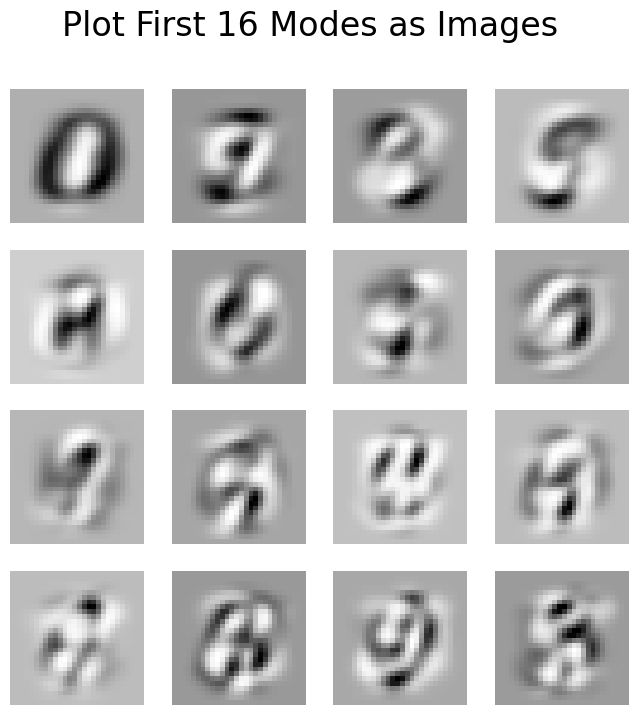

In [4]:
#pca w/ 16 components

from sklearn.decomposition import PCA

# apply PCA to X_train
pca = PCA()
Xtrain_pca = pca.fit_transform(Xtraindata.T)

print("Shape of Xtrain_pca:", Xtrain_pca.shape)

modes = pca.components_

plot_digits(modes.T, 4, 'Plot First 16 Modes as Images')

## Task 2

Inspect the cumulative energy of the singular values and determine 𝑘: the number of PC modes needed
to approximate 85% of the energy. You may also want to inspect several approximated digit images
reconstructed from 𝑘 truncated PC modes and plot them to make sure that the image reconstruction
using truncated modes is reasonable.

In [193]:
#singular values - variances in each direction 
sing = pca.singular_values_

#find the full Frobenius norm (energy) - using all 784 PCA spatial modes
#fullnorm = np.sqrt(np.sum(sing**2))
fullnorm = np.sum(sing**2)
print(fullnorm)

205706725984.23734


85.01877639284679
59


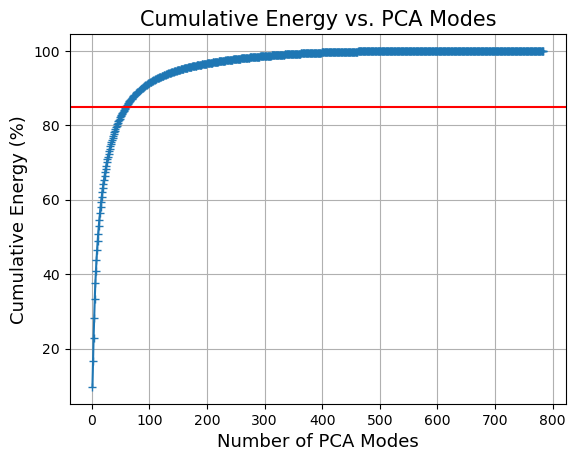

In [194]:
# PCA for different numbers of PC modes

energies = []

for j in np.arange(1,784+1):
    s = sing[:j]
    #norm = np.sqrt(np.sum(s**2))
    norm = np.sum(s**2)
    energy = (norm/fullnorm) * 100
    energies.append(energy)

counter = 0
for i in energies:
    counter += 1
    if i >= 85:
        print(i)
        print(counter)
        break

# plot the cumulative energy as a function of number of PCA spatial modes
plt.plot(np.arange(1,784+1), energies, marker='+')
plt.xlabel('Number of PCA Modes', fontsize=13)
plt.ylabel('Cumulative Energy (%)', fontsize=13)
plt.title('Cumulative Energy vs. PCA Modes', fontsize=15)
plt.grid(True)

plt.axhline(y=energies[58], color='r')


In [195]:
# energy cumulative sum
# cumsum(explained variance ratio)

In [196]:
# maybe can delete this - don't need plots for every number of modes, just compare a few 

for k in range(1,10):
    pca_k = PCA(n_components=k)
    Xtrain_pca_k = pca_k.fit_transform(Xtraindata.T)

    iXtrain = pca_k.inverse_transform(Xtrain_pca_k)

    #plot_digits(iXtrain.T, 4, 'Plot Digits with First ?? Modes')

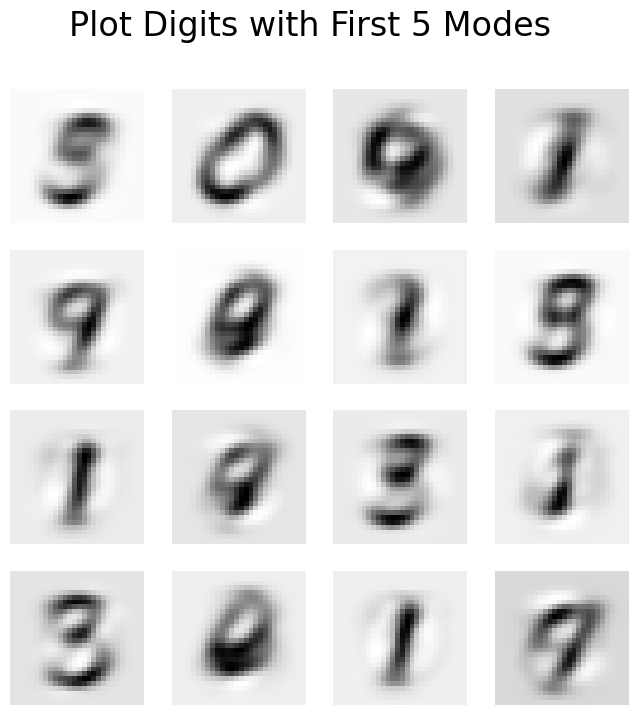

In [197]:
#plot reconstructed digits with first 5 modes
pca_5 = PCA(n_components=5)
Xtrain_pca_5 = pca_5.fit_transform(Xtraindata.T)

iXtrain_5 = pca_5.inverse_transform(Xtrain_pca_5)

plot_digits(iXtrain_5.T, 4, 'Plot Digits with First 5 Modes')

In [204]:
#plot reconstructed digits with first 29 modes
pca_29 = PCA(n_components=29)
Xtrain_pca_29 = pca_29.fit_transform(Xtraindata.T)
Xtest_pca_29 = pca_29.transform(Xtestdata.T)

iXtrain_29 = pca_29.inverse_transform(Xtrain_pca_29)

#plot_digits(iXtrain_29.T, 4, 'Plot Digits with First 29 Modes')

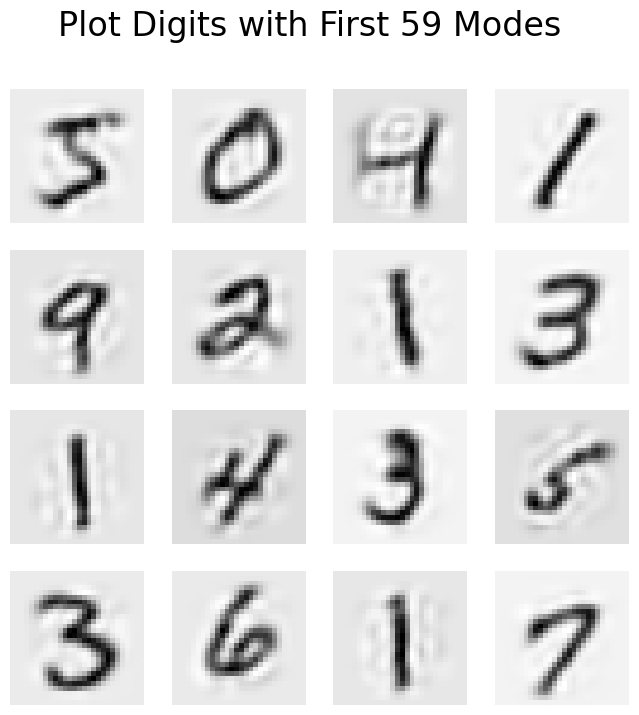

In [199]:
#plot reconstructed digits with first 59 modes
pca_59 = PCA(n_components=59)
Xtrain_pca_59 = pca_59.fit_transform(Xtraindata.T)
Xtest_pca_59 = pca_59.transform(Xtestdata.T)

iXtrain_59 = pca_59.inverse_transform(Xtrain_pca_59)

plot_digits(iXtrain_59.T, 4, 'Plot Digits with First 59 Modes')

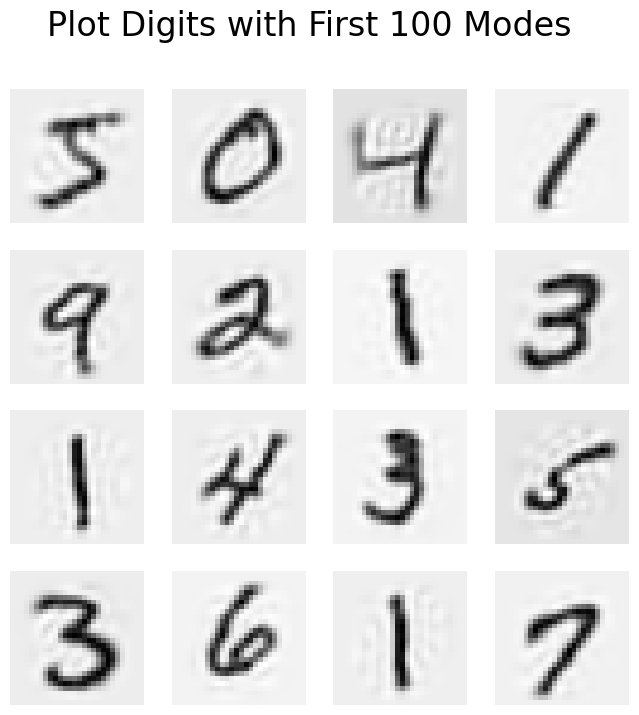

In [200]:
#plot reconstructed digits with first 100 modes
pca_100 = PCA(n_components=100)
Xtrain_pca_100 = pca_100.fit_transform(Xtraindata.T)

iXtrain_100 = pca_100.inverse_transform(Xtrain_pca_100)

plot_digits(iXtrain_100.T, 4, 'Plot Digits with First 100 Modes')

## Task 3

Write a function that selects a subset of particular digits (all samples of them) from 𝑋𝑡𝑟𝑎𝑖𝑛, 𝑦𝑡𝑟𝑎𝑖𝑛,
𝑋𝑡𝑒𝑠𝑡 and 𝑦𝑡𝑒𝑠𝑡 and returns the subset as new matrices 𝑋𝑠𝑢𝑏𝑡𝑟𝑎𝑖𝑛, 𝑦𝑠𝑢𝑏𝑡𝑟𝑎𝑖𝑛, 𝑋𝑠𝑢𝑏𝑡𝑒𝑠𝑡 and 𝑦𝑠𝑢𝑏𝑡𝑒𝑠𝑡.

In [59]:
# Task 3 - function correct but ends up in a weird format

# print(ytrainlabels)
# print(ytrainlabels.shape)
# print(Xtraindata.shape)

# def select_digits(digit_subset):
#     row = 0
#     test_row = 0
#     X_subtrain = []
#     y_subtrain =[]
#     X_subtest = []
#     y_subtest = []

#     for image in Xtraindata:
#         row += 1
#         if ytrainlabels[row - 1] in digit_subset:

#             X_subtrain.append(image)
#             y_subtrain.append(ytrainlabels[row-1])

#     for test_image in Xtestdata:
#         test_row += 1
#         if ytestlabels[test_row - 1] in digit_subset:

#             X_subtest.append(test_image)
#             y_subtest.append(ytestlabels[test_row-1])

#     return X_subtrain, y_subtrain, X_subtest, y_subtest

In [60]:
def select_digits(digit_subset):
    tr_sublabels = np.where(np.isin(ytrainlabels, digit_subset))[0]
    test_sublabels = np.where(np.isin(ytestlabels, digit_subset))[0]

    X_subtrain = Xtraindata[:,tr_sublabels]
    X_subtest = Xtestdata[:,test_sublabels]
    y_subtrain = ytrainlabels[tr_sublabels]
    y_subtest = ytestlabels[test_sublabels]

    return X_subtrain, y_subtrain, X_subtest, y_subtest

In [61]:
#print(select_digits([0,1]))

## Task 4
Select the digits 1,8 using step 3, project the data onto 𝑘-PC modes computed in steps 1-2, and apply
the Ridge classifier (linear) to distinguish between these two digits. Perform cross-validation and
testing and discuss your results

In [221]:
Xsubtrain_18 = select_digits([1,8])[0]
ysubtrain_18 = select_digits([1,8])[1]
Xsubtest_18 = select_digits([1,8])[2]
ysubtest_18 = select_digits([1,8])[3]


In [222]:
# project 1,8 digits onto k=29 PC modes 
Xtr18_pca59 = pca_59.transform(Xsubtrain_18.T)
Xtest18_pca59 = pca_59.transform(Xsubtest_18.T)

In [223]:
# RidgeClassifier applied to classify the digits 
from sklearn.linear_model import RidgeClassifierCV

RidgeCL = RidgeClassifierCV()
RidgeCL.fit(Xtr18_pca59, ysubtrain_18)

RidgeClassifierCV()

In [224]:
# estimate accuracy for Training and Testing

print("Training Score: {}".format(RidgeCL.score(Xtr18_pca59, ysubtrain_18)))
print("Testing Score: {}".format(RidgeCL.score(Xtest18_pca59, ysubtest_18)))

Training Score: 0.9664893194631938
Testing Score: 0.9800853485064012


In [150]:
from sklearn.model_selection import cross_val_score

#another way of finding accuracy - not trusting the built in scores

tr_scores18 = cross_val_score(RidgeCL, Xtr18_pca59, ysubtrain_18, cv=5)

print("{} training accuracy with a standard deviation of {}".format(tr_scores18.mean(), tr_scores18.std()))

0.9642661444191736 training accuracy with a standard deviation of 0.0026656346829298677


In [151]:
test_scores18 = cross_val_score(RidgeCL, Xtest18_pca59, ysubtest_18, cv=5)

print("{} test accuracy with a standard deviation of {}".format(test_scores18.mean(), test_scores18.std()))

0.9724994652767615 test accuracy with a standard deviation of 0.013029693297444567


In [152]:
# For RidgeClassifierCV, an optimal alpha is chosen

# For RidgeClassifier, need to specify an alpha
# alpha is lambda  - evaluate different alphas - just has to be positive
# trying to minimize AB-Y 
# regularization - high or low tolerance for large B??? 
# plot for three different alphas 

## Task 5
Repeat the same classification procedure for pairs of digits 3,8 and 2,7. Report your results and
compare them with the results in step 4. If there is any difference can you explain it?

#### Classification for Digits 3, 8

In [190]:
# Classification for digits 3, 8

Xsubtrain_38 = select_digits([3,8])[0]
ysubtrain_38 = select_digits([3,8])[1]
Xsubtest_38 = select_digits([3,8])[2]
ysubtest_38 = select_digits([3,8])[3]

# project 3,8 digits onto k=29 PC modes 
Xtr38_pca59 = pca_59.transform(Xsubtrain_38.T)
Xtest38_pca59 = pca_59.transform(Xsubtest_38.T)

In [191]:
# RidgeClassifier applied to classify the digits 

RidgeCL.fit(Xtr38_pca59, ysubtrain_38)

RidgeClassifierCV()

In [192]:
# estimate accuracy for Training and Testing

print("Training Score: {}".format(RidgeCL.score(Xtr38_pca59, ysubtrain_38)))
print("Testing Score: {}".format(RidgeCL.score(Xtest38_pca59, ysubtest_38)))

#another way of finding accuracy - not trusting the built in scores

tr_scores38 = cross_val_score(RidgeCL, Xtr38_pca59, ysubtrain_38, cv=5)
print("{} training accuracy with a standard deviation of {}".format(tr_scores38.mean(), tr_scores38.std()))

test_scores38 = cross_val_score(RidgeCL, Xtest38_pca59, ysubtest_38, cv=5)
print("{} test accuracy with a standard deviation of {}".format(test_scores38.mean(), test_scores38.std()))

Training Score: 0.9602737439492572
Testing Score: 0.9642137096774194
0.9587721992501758 training accuracy with a standard deviation of 0.006085252018793172
0.9561547464570135 test accuracy with a standard deviation of 0.010380277357025972


#### Classification for digits 2, 7

In [185]:
Xsubtrain_27 = select_digits([2,7])[0]
ysubtrain_27 = select_digits([2,7])[1]
Xsubtest_27 = select_digits([2,7])[2]
ysubtest_27 = select_digits([2,7])[3]

# project 2,7 digits onto k=29 PC modes 
Xtr27_pca59 = pca_59.transform(Xsubtrain_27.T)
Xtest27_pca59 = pca_59.transform(Xsubtest_27.T)

In [186]:
# RidgeClassifier applied to classify the digits 

RidgeCL.fit(Xtr27_pca59, ysubtrain_27)

RidgeClassifierCV()

In [188]:
# estimate accuracy for Training and Testing

print("Training Score: {}".format(RidgeCL.score(Xtr27_pca59, ysubtrain_27)))
print("Testing Score: {}".format(RidgeCL.score(Xtest27_pca59, ysubtest_27)))

#another way of finding accuracy - not trusting the built in scores

tr_scores27 = cross_val_score(RidgeCL, Xtr27_pca59, ysubtrain_27, cv=5)
print("{} training accuracy with a standard deviation of {}".format(tr_scores27.mean(), tr_scores27.std()))

test_scores27 = cross_val_score(RidgeCL, Xtest27_pca59, ysubtest_27, cv=5)
print("{} test accuracy with a standard deviation of {}".format(test_scores27.mean(), test_scores27.std()))

Training Score: 0.9803648858708991
Testing Score: 0.974757281553398
0.9797104548847141 training accuracy with a standard deviation of 0.0014301274223246492
0.9694174757281553 test accuracy with a standard deviation of 0.007917236131213631


## Task 6
Use all the digits and perform multi-class classification with Ridge, KNN and LDA classifiers. Report
your results and discuss how they compare between the methods. Which method performs the best?

### Ridge Classifier

In [231]:
Xsubtrain_full = select_digits([0,1,2,3,4,5,6,7,8,9])[0]
ysubtrain_full = select_digits([0,1,2,3,4,5,6,7,8,9])[1]
Xsubtest_full = select_digits([0,1,2,3,4,5,6,7,8,9])[2]
ysubtest_full = select_digits([0,1,2,3,4,5,6,7,8,9])[3]

# project all digits onto k=29 PC modes 
Xtrfull_pca59 = pca_59.transform(Xsubtrain_full.T)
Xtestfull_pca59 = pca_59.transform(Xsubtest_full.T)

In [232]:
# RidgeClassifier applied to classify the digits 

RidgeCL.fit(Xtrfull_pca59, ysubtrain_full)

RidgeClassifierCV()

In [233]:
# estimate accuracy for Training and Testing

print("Training Score: {}".format(RidgeCL.score(Xtrfull_pca59, ysubtrain_full)))
print("Testing Score: {}".format(RidgeCL.score(Xtestfull_pca59, ysubtest_full)))

# print("Training Score: {}".format(RidgeCL.score(Xtrain_pca_59, ytrainlabels)))
# print("Testing Score: {}".format(RidgeCL.score(Xtest_pca_59, ytestlabels)))

#another way of finding accuracy - not trusting the built in scores

tr_scoresfull = cross_val_score(RidgeCL, Xtrfull_pca59, ysubtrain_full, cv=5)
print("{} training accuracy with a standard deviation of {}".format(tr_scoresfull.mean(), tr_scoresfull.std()))

# test_scoresfull = cross_val_score(RidgeCL, Xtestfull_pca59, ysubtest_full, cv=5)
# print("{} test accuracy with a standard deviation of {}".format(test_scoresfull.mean(), test_scoresfull.std()))

print(tr_scoresfull)

Training Score: 0.8453666666666667
Testing Score: 0.8561
0.8440666666666667 training accuracy with a standard deviation of 0.009791776595127585
[0.85       0.83325    0.83641667 0.84058333 0.86008333]


In [234]:
# trials

for j in range(1,6):
    pca_jtrials = PCA(n_components=59)
    Xtrain_pca_jtrials = pca_jtrials.fit_transform(Xtraindata.T)
    
    Xtestfull_pca_jtrials = pca_jtrials.transform(Xtestdata.T) 

    RidgeCLj = RidgeClassifierCV(alphas = np.logspace(-3,3,100))
    RidgeCLj.fit(Xtrain_pca_jtrials, ytrainlabels)

    print("Training Score: {}".format(RidgeCLj.score(Xtrain_pca_jtrials, ytrainlabels)))
    print("Testing Score: {}".format(RidgeCLj.score(Xtestfull_pca_jtrials, ytestlabels)))



Training Score: 0.8453666666666667
Testing Score: 0.8561
Training Score: 0.8453666666666667
Testing Score: 0.8561
Training Score: 0.8453666666666667
Testing Score: 0.8561
Training Score: 0.8453666666666667
Testing Score: 0.8561
Training Score: 0.8453666666666667
Testing Score: 0.8561


### Confusion Matrix

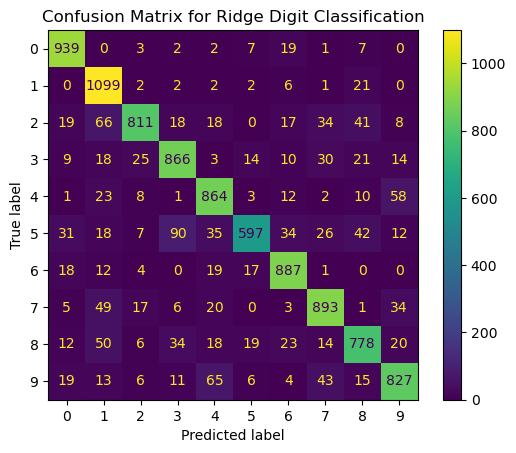

In [235]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = RidgeCL.predict(Xtestfull_pca59)
#y_pred = RidgeCL.predict(Xtest_pca_59)


fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(ysubtest_full, y_pred, ax=ax)
#ConfusionMatrixDisplay.from_predictions(ytestlabels, y_pred, ax=ax)
ax.xaxis.set_ticklabels([0,1,2,3,4,5,6,7,8,9])
ax.yaxis.set_ticklabels([0,1,2,3,4,5,6,7,8,9])
_ = ax.set_title(
    f"Confusion Matrix for Ridge Digit Classification"
)

### KNN

In [131]:
# KNN Classifier applied to classify the digits 
from sklearn.neighbors import KNeighborsClassifier

KNNCL = KNeighborsClassifier(n_neighbors=3)
KNNCL.fit(Xtrain_pca_59, ytrainlabels)

KNeighborsClassifier(n_neighbors=3)

In [225]:
# estimate accuracy for Training and Testing - for KNN 3 neighbors  

print("Training Score: {}".format(KNNCL.score(Xtrain_pca_59, ytrainlabels)))
print("Testing Score: {}".format(KNNCL.score(Xtest_pca_59, ytestlabels)))

knn_train_score = cross_val_score(KNNCL, Xtrain_pca_59, ytrainlabels, cv=5)
print("{} training accuracy with a standard deviation of {}".format(knn_train_score.mean(), knn_train_score.std()))

knn_test_score = cross_val_score(KNNCL, Xtest_pca_59, ytestlabels, cv=5)
print("{} testing accuracy with a standard deviation of {}".format(knn_test_score.mean(), knn_test_score.std()))

Training Score: 0.98925
Testing Score: 0.9752
0.9753499999999999 training accuracy with a standard deviation of 0.0013818264885449335
0.9532999999999999 testing accuracy with a standard deviation of 0.01532187978023582


In [133]:
k_values = [i for i in range (1,20)]
scores = []

for k in k_values:
    KNNCLk = KNeighborsClassifier(n_neighbors=k)
    scorescv = cross_val_score(KNNCLk, Xtrain_pca_59, ytrainlabels, cv=5)
    print("{} accuracy with a standard deviation of {}".format(scorescv.mean(), scorescv.std()))
    scores.append(scorescv.mean())

# print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

0.9738 accuracy with a standard deviation of 0.0020504741998972993
0.9705166666666667 accuracy with a standard deviation of 0.001175443178833694
0.9753499999999999 accuracy with a standard deviation of 0.0013818264885449335
0.9744666666666666 accuracy with a standard deviation of 0.0014931324269616842
0.9746666666666666 accuracy with a standard deviation of 0.0012360330811826
0.9737333333333332 accuracy with a standard deviation of 0.0011976829482147754
0.9736333333333335 accuracy with a standard deviation of 0.001067967956240055
0.9728833333333332 accuracy with a standard deviation of 0.0005441609239104883
0.9722500000000001 accuracy with a standard deviation of 0.0012494443209327662
0.9716333333333333 accuracy with a standard deviation of 0.0009061518146045419
0.9709000000000001 accuracy with a standard deviation of 0.0013978157564174568
0.9704499999999999 accuracy with a standard deviation of 0.0010241527663824763
0.9697333333333333 accuracy with a standard deviation of 0.0013306222

0.9753499999999999
3


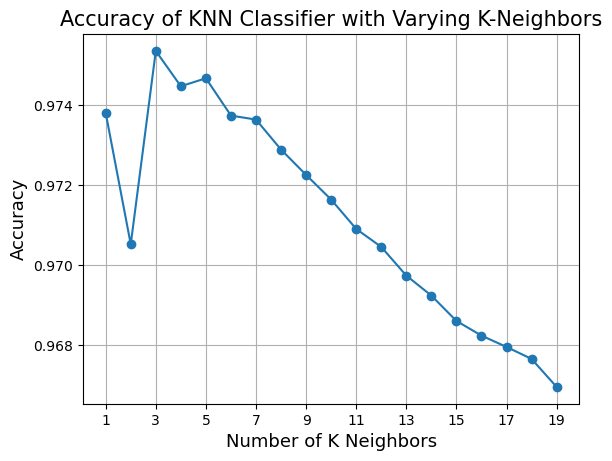

In [134]:
k_peak = np.argmax(scores)
optimal_knn = k_peak + 1

print(scores[k_peak])
print(optimal_knn)

plt.plot(k_values, scores, marker = "o")
plt.xlabel('Number of K Neighbors', fontsize=13)
plt.xticks(range(1, 20, 2))
plt.ylabel('Accuracy', fontsize=13)
plt.title('Accuracy of KNN Classifier with Varying K-Neighbors', fontsize=15)
plt.grid(True)


In [ ]:
# testing - peak k graph

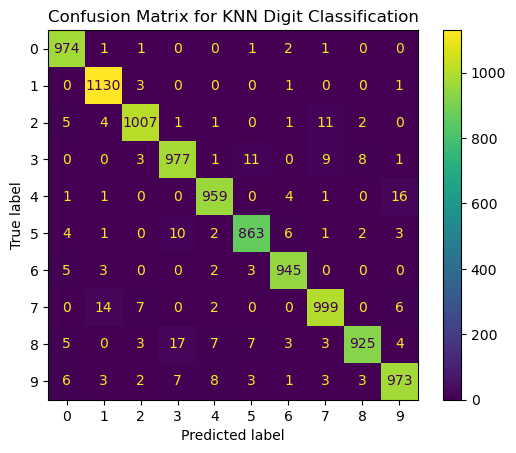

In [ ]:
knn_pred = KNNCL.predict(Xtest_pca_59)


fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(ytestlabels, knn_pred, ax=ax)
ax.xaxis.set_ticklabels([0,1,2,3,4,5,6,7,8,9])
ax.yaxis.set_ticklabels([0,1,2,3,4,5,6,7,8,9])
_ = ax.set_title(
    f"Confusion Matrix for KNN Digit Classification"
)

### LDA

In [136]:
# LDA Classifier applied to classify the digits 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDACL = LinearDiscriminantAnalysis()
LDACL.fit(Xtrain_pca_59, ytrainlabels)


LinearDiscriminantAnalysis()

In [137]:
# estimate accuracy for Training and Testing

print("Training Score: {}".format(LDACL.score(Xtrain_pca_59, ytrainlabels)))
print("Testing Score: {}".format(LDACL.score(Xtest_pca_59, ytestlabels)))

lda_train_score = cross_val_score(LDACL, Xtrain_pca_59, ytrainlabels, cv=5)
print("{} training accuracy with a standard deviation of {}".format(lda_train_score.mean(), lda_train_score.std()))

lda_test_score = cross_val_score(LDACL, Xtest_pca_59, ytestlabels, cv=5)
print("{} testing accuracy with a standard deviation of {}".format(lda_test_score.mean(), lda_test_score.std()))


Training Score: 0.86645
Testing Score: 0.8753
0.8650833333333333 training accuracy with a standard deviation of 0.008738643423832385
0.8634999999999998 testing accuracy with a standard deviation of 0.030177806414648494


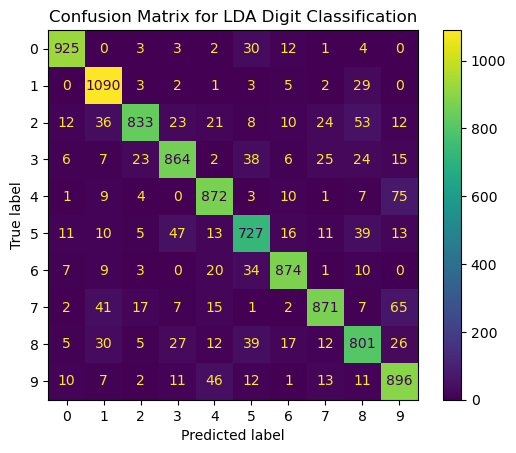

In [228]:
lda_pred = LDACL.predict(Xtest_pca_59)

fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(ytestlabels, lda_pred, ax=ax)
ax.xaxis.set_ticklabels([0,1,2,3,4,5,6,7,8,9])
ax.yaxis.set_ticklabels([0,1,2,3,4,5,6,7,8,9])
_ = ax.set_title(
    f"Confusion Matrix for LDA Digit Classification"
)

## Bonus
Implement an alternative classifier, that we did not cover in class, (e.g. SVM), and
compare its results with the classifiers in the previous step.

In [139]:
from sklearn import svm

SVMCL = svm.SVC()
SVMCL.fit(Xtrain_pca_59, ytrainlabels)

SVC()

In [140]:
# estimate accuracy for Training and Testing

print("Training Score: {}".format(SVMCL.score(Xtrain_pca_59, ytrainlabels)))
print("Testing Score: {}".format(SVMCL.score(Xtest_pca_59, ytestlabels)))

svm_train_score = cross_val_score(SVMCL, Xtrain_pca_59, ytrainlabels, cv=5)
print("{} training accuracy with a standard deviation of {}".format(svm_train_score.mean(), svm_train_score.std()))

svm_test_score = cross_val_score(SVMCL, Xtest_pca_59, ytestlabels, cv=5)
print("{} testing accuracy with a standard deviation of {}".format(svm_test_score.mean(), svm_test_score.std()))

Training Score: 0.9918666666666667
Testing Score: 0.9841
0.98125 training accuracy with a standard deviation of 0.0015916448515084466
0.9645999999999999 testing accuracy with a standard deviation of 0.011888650049522033


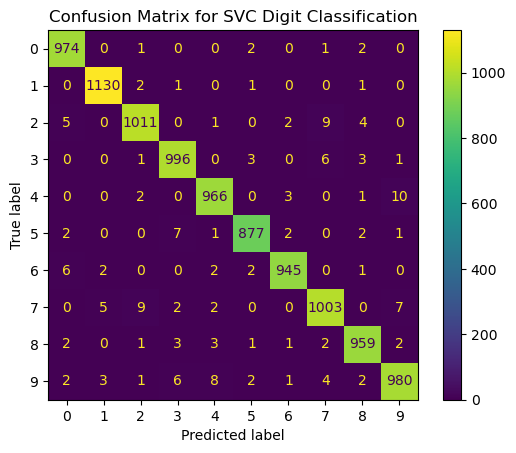

In [141]:
svm_pred = SVMCL.predict(Xtest_pca_59)

fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(ytestlabels, svm_pred, ax=ax)
ax.xaxis.set_ticklabels([0,1,2,3,4,5,6,7,8,9])
ax.yaxis.set_ticklabels([0,1,2,3,4,5,6,7,8,9])
_ = ax.set_title(
    f"Confusion Matrix for {SVMCL.__class__.__name__} Digit Classification"
)

### Comparisons of Training/Testing Mean and Standard Dev

In [226]:
# Means for plotting

ridge_mean_train = tr_scoresfull.mean()
knn_mean_train = knn_train_score.mean()
lda_mean_train = lda_train_score.mean()
svm_mean_train = svm_train_score.mean()

ridge_mean_test = test_scoresfull.mean()
knn_mean_test = knn_test_score.mean()
lda_mean_test = lda_test_score.mean()
svm_mean_test = svm_test_score.mean()

# Standard Devs for plotting

ridge_std_train = tr_scoresfull.std()
knn_std_train = knn_train_score.std()
lda_std_train = lda_train_score.std()
svm_std_train = svm_train_score.std()

ridge_std_test = RidgeCL.score(Xtestfull_pca59, ysubtest_full) # test_scoresfull.std() 
knn_std_test = knn_test_score.std()
lda_std_test = lda_test_score.std()
svm_std_test = svm_test_score.std()

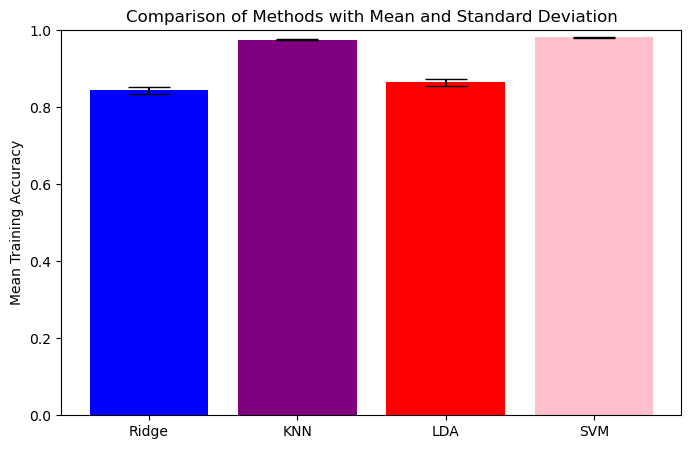

In [227]:
#  means and standard deviations for the 4 methods - TRAIN
methods = ['Ridge', 'KNN', 'LDA', 'SVM']
train_means = [ridge_mean_train, knn_mean_train, lda_mean_train, svm_mean_train]  # Example accuracy or performance values
train_std_devs = [ridge_std_train, knn_std_train, lda_std_train, svm_std_train]  # Example standard deviations

plt.figure(figsize=(8, 5))
plt.bar(methods, train_means, yerr=train_std_devs, capsize=15, color=['blue', 'purple', 'red', 'pink'])

# Labels and title
plt.ylabel('Mean Training Accuracy')
plt.title('Comparison of Methods with Mean and Standard Deviation')
plt.ylim(0, 1)  #Accuracy score values are between 0 and 1

# Show plot
plt.show()


In [ ]:
# best is SVM but also KNN is soooo close that we can practically say its good - discuss 